# Demonstration of how to operate X22 model

In [1]:
import numpy as np
from X22_model.disk_model import *

## Opacity table 

In [2]:
maximum_grain_size  = 0.1 # mm
power_law_index_q   = -3.5
d_to_g_ratio        = 0.01

In [3]:
opacity_table = generate_opacity_table_opt(
    a_min=1e-6, a_max=maximum_grain_size*0.1, # X22 adopts cgs units
    q=power_law_index_q, dust_to_gas=d_to_g_ratio,
    save_table=False
)

In [4]:
lam = opacity_table['lam'] * 10 # wavelenght in mm
kappa_abs = opacity_table['kappa'] # absorption opacity
kappa_sca = opacity_table['kappa_s'] # effective scattering opacity

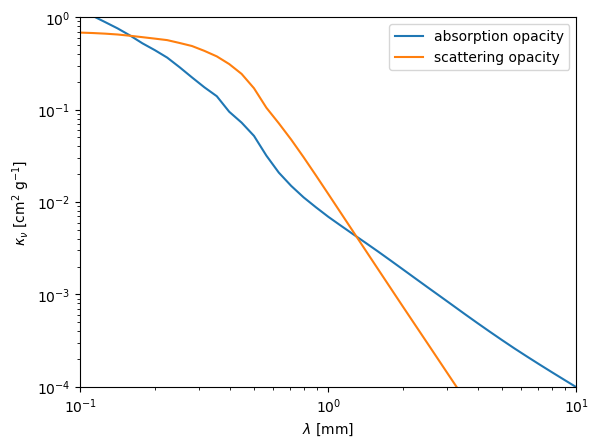

In [5]:
plt.plot(lam, kappa_abs[0, :], label='absorption opacity')
plt.plot(lam, kappa_sca[0, :], label='scattering opacity')
plt.xscale('log'); plt.yscale('log')
plt.xlim(1e-1, 1e1); plt.xlabel(r'$\lambda$ [mm]')
plt.ylim(1e-4,1e0); plt.ylabel(r'$\kappa_\nu$ [cm$^2$ g$^{-1}$]')
plt.legend()
plt.show()

In [6]:
T_grid = opacity_table['T']
kappa_ros = opacity_table['kappa_r'] # Rosseland mean opacity
kappa_pla = opacity_table['kappa_p'] # Planck mean opacity

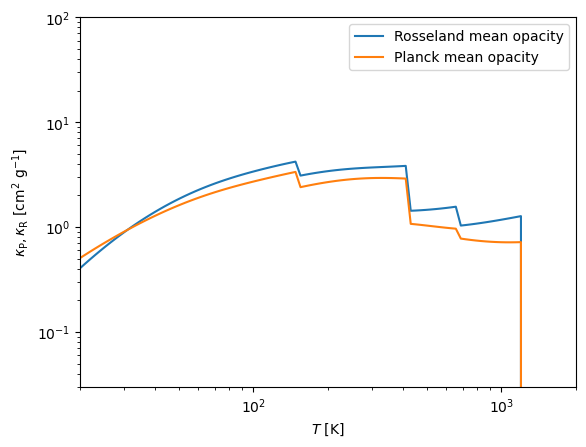

In [7]:
plt.plot(T_grid, kappa_ros, label='Rosseland mean opacity')
plt.plot(T_grid, kappa_pla, label='Planck mean opacity')
plt.xscale('log');plt.yscale('log')
plt.xlim(2e1,2e3); plt.xlabel(r'$T$ [K]')
plt.ylim(3e-2,1e2); plt.ylabel(r'$\kappa_{\rm P}, \kappa_{\rm R}$ [cm$^2$ g$^{-1}$]')
plt.legend()
plt.show()

## 

## DiskModel Class 

In [8]:
disk_property_table = generate_disk_property_table(opacity_table=opacity_table)

In [9]:
DM = DiskModel(opacity_table=opacity_table, disk_property_table=disk_property_table)

In [10]:
mstar   = 0.1 * Msun # Mass of the central protostar
mdot    = 1e-6 * Msun / yr # Rate of mass infall from the envelope onto the disk
Rd      = 60 * au # Disk radius
Q       = 0.5 # Toomre index
NR      = 200 # Number of grid points in the radial direction

In [11]:
DM.generate_disk_profile(
    Mstar=mstar, 
    Mdot=mdot, 
    Rd=Rd, 
    Q=Q,
    N_R=NR,
)

In [12]:
R_grid  = DM.R[1:] / au
T_mid   = DM.T_mid
Sigma   = DM.Sigma
tau_r_mid = DM.tau_r_mid
tau_p_mid = DM.tau_p_mid

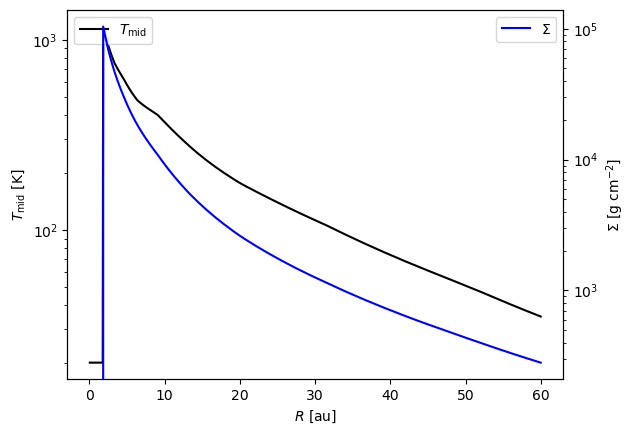

In [13]:
fig, ax = plt.subplots()
ax_twinx = ax.twinx()

ax.plot(R_grid, T_mid, 'k-', label=r'$T_{\rm mid}$')
ax.set_xlabel(r'$R$ [au]')
ax.set_ylabel(r'$T_{\rm mid}$ [K]')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper left')

ax_twinx.plot(R_grid, Sigma, 'b-', label=r'$\Sigma$')
ax_twinx.set_ylabel(r'$\Sigma$ [g cm$^{-2}$]')
ax_twinx.set_yscale('log')
ax_twinx.legend(loc='upper right')

plt.show()

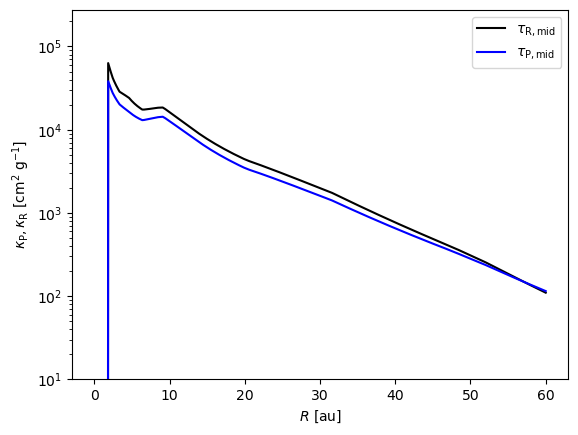

In [14]:
plt.plot(R_grid, tau_r_mid, 'k-', label=r'$\tau_{\rm R, mid}$')
plt.plot(R_grid, tau_p_mid, 'b-', label=r'$\tau_{\rm P, mid}$')
plt.xlabel(r'$R$ [au]')
plt.ylabel(r'$\kappa_{\rm P}, \kappa_{\rm R}$ [cm$^2$ g$^{-1}$]')
plt.yscale('log'); plt.ylim(bottom=1e1)

plt.legend()
plt.show()